# Chapter 2

In [1]:
from summer import CompartmentalModel
import matplotlib.pyplot as plt

In [2]:
# Key input parameters in model
t_step = 1  # Size of time step (days)
total_population = 100000  # Total population size
ave_preinfous = 2  # Average pre-infectious period (days)
ave_infous = 2  # Average duration of infectiousness (days)
r0 = 2  # R0

# Parameters derived from the above
beta = r0 * t_step / (ave_infous * total_population)
infous_rate = t_step / ave_preinfous
rec_rate = t_step / ave_infous

infectious_seed = 1

In [3]:
# Set up the SEIR model
compartments = ("Susceptible", "Pre-infectious", "Infectious", "Immune")
seir_model = CompartmentalModel(
    times=[0, 200],
    compartments=compartments,
    infectious_compartments=["Infectious"],
    timestep=t_step,
)
seir_model.set_initial_population(
    distribution={
        "Susceptible": total_population - infectious_seed, 
        "Infectious": infectious_seed
    }
)
seir_model.add_infection_frequency_flow(
    name="infection", 
    contact_rate=1, 
    source="Susceptible", 
    dest="Pre-infectious"
)
seir_model.add_transition_flow(
    name="progression", 
    fractional_rate=infous_rate,
    source="Pre-infectious", 
    dest="Infectious"
)
seir_model.add_transition_flow(
    name="recovery", 
    fractional_rate=rec_rate, 
    source="Infectious", 
    dest="Immune"
)
seir_model.request_output_for_flow(
    name="incidence", 
    flow_name="progression"
)
seir_model.request_output_for_flow(
    name="infection", 
    flow_name="infection"
)

In [4]:
# Run the SEIR model
seir_model.run()

(0.0, 5000.0)

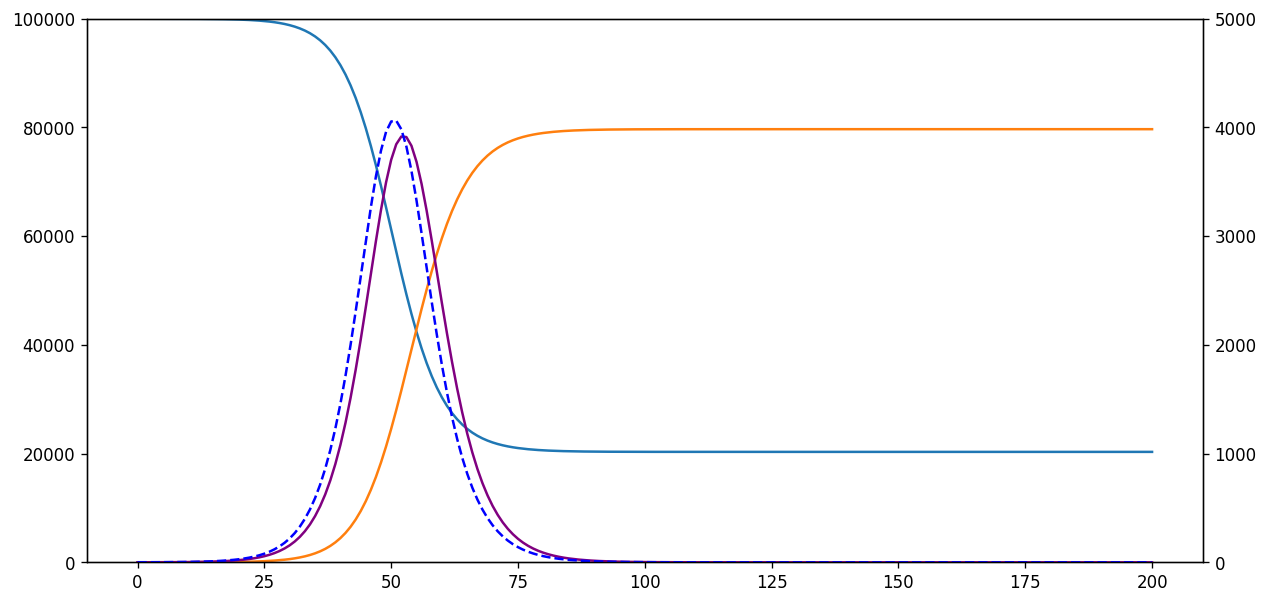

In [5]:
# Plot the outputs

# Create axes
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)
right_ax = ax.twinx()

# Plot
for compartment_idx in [0, -1]:
    ax.plot(seir_model.times, seir_model.outputs.T[compartment_idx])
right_ax.plot(seir_model.times, seir_model.derived_outputs["incidence"], color="purple")
right_ax.plot(seir_model.times, seir_model.derived_outputs["infection"], color="blue", linestyle="--")

# Tidy up
ax.set_ylim((0, 1e5))
right_ax.set_ylim((0, 5000))

In [6]:
# Set up the SIR model
compartments = ("Susceptible", "Infectious", "Immune")
sir_model = CompartmentalModel(
    times=[0, 200],
    compartments=compartments,
    infectious_compartments=["Infectious"],
    timestep=t_step,
)
sir_model.set_initial_population(
    distribution={
        "Susceptible": total_population - infectious_seed, 
        "Infectious": infectious_seed
    }
)
sir_model.add_infection_frequency_flow(
    name="infection", 
    contact_rate=1, 
    source="Susceptible", 
    dest="Infectious"
)
sir_model.add_transition_flow(
    name="recovery", 
    fractional_rate=rec_rate, 
    source="Infectious", 
    dest="Immune"
)
sir_model.request_output_for_flow(
    name="infection", 
    flow_name="infection"
)

In [7]:
# Run the SIR model
sir_model.run()

(0.0, 10000.0)

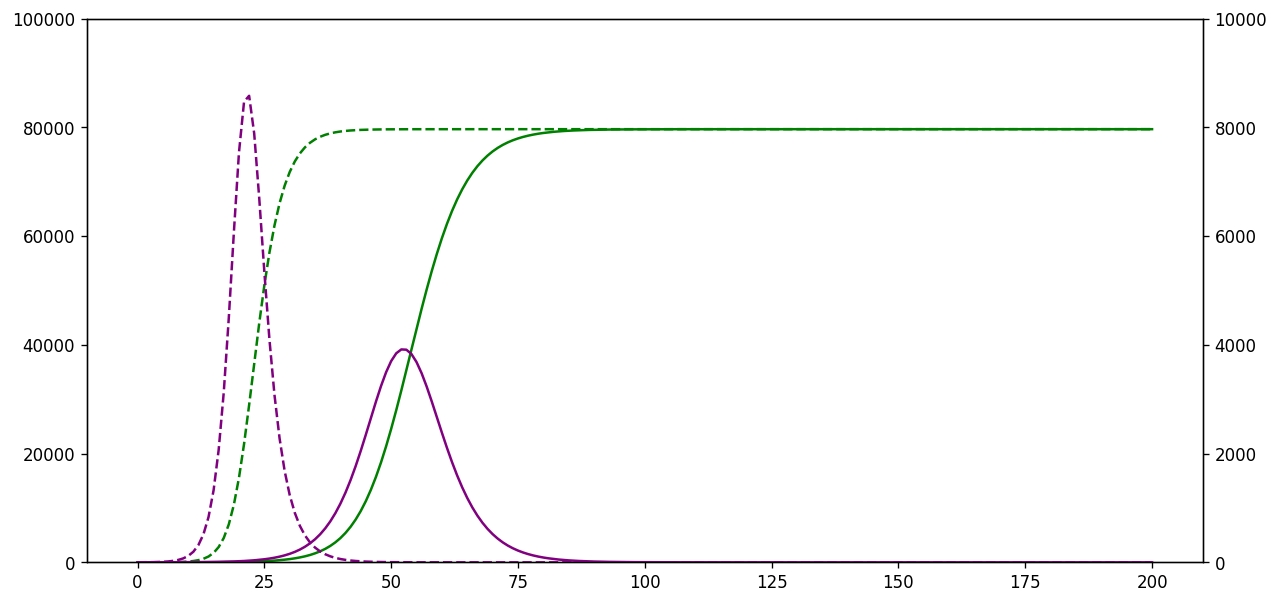

In [11]:
# Plot the outputs

# Create axes
fig, ax = plt.subplots(1, 1, figsize=(12, 6), dpi=120)
right_ax = ax.twinx()

# Plot
ax.plot(seir_model.times, seir_model.outputs.T[-1], color="green")
ax.plot(sir_model.times, sir_model.outputs.T[-1], color="green", linestyle="--")
right_ax.plot(seir_model.times, seir_model.derived_outputs["incidence"], color="purple")
right_ax.plot(sir_model.times, sir_model.derived_outputs["infection"], color="purple", linestyle="--")

# Tidy up
ax.set_ylim((0, 1e5))
right_ax.set_ylim((0, 1e4))